In [6]:
"""
Pointer Immediate Tasks:
- Run an experiment where I take trained pointer networks and transition them to a dominoe based value 
function and a gamma < 1, and show that they can learn to prioritize playing high value dominoes first. Then...
-  Add the context vector that encodes the number of turns left (with uncertainty?)
    - so the full pointer network will get an extra context input that describes how many turns are left
    - 0 rewards will be given after the possible turns are over
    - so the network will have to learn to get as much value out as quickly as possible
-  Also apply these networks to the vehicle routing problem?
-  Analyze encoding space of pointer networks...
-  Do the encoder swap of different pointer layers...
-  Does the speed of learning for the different networks on the sequencer task come from true performance or just sensitivity to the temperature? 
"""

"""
Add mechanism for printing the arguments used to build a pointernetwork so the user can see what they did. 
Add mechanism for storing hidden parameters to entire pointer network

Add documentation of baseline updates and performance etc
Add some dataset specific summary plots and integrate into plotting code? 
Get the supervised learning methods working for each dataset and task
Checkpointing, figure making, logging, etc

it worked!!! now trying without embedding bias...
it works without embedding bias. It works (with different speeds per pointer layer!) with lower train temperature
 (but of course that could be because of differential sensitivity to temperature..., should test that directly)
now trying with 1 encoding layer. 

:)

TODO: 
DOMINOES SEQUENCER Comparison of max to real reward:
- Add target to batch (can do post-hoc, even if not requested)
- Measure reward of target
- Add a 2D vector comparing max and real reward for each batch element!!

TSP Distance Traveled:
- Explicitly measure the distance traveled by the agent in the TSP task
- Compare to Held-Karp Solution


TODO ASAP!!!!!!
I'm running experiments with attention only pointers and saving the networks. Will use trained networks
to test some other dataset specific variables and plots, etc when they're finished, then integrate those
into the main workflow. 

TODO ASAP!!!!!!
Make a checkpoint from the trained & saved dominoe_sequencer results to continue training etc.
"""

# consider adding a parameter comparison for using checkpoints --- it might be different!!! then we don't want to reuse the checkpoints...
# think more carefully about how to handle the ignore index for reward computation.....

# for curriculum learning, need a more clever way of handling checkpoints for multiple phases...
# for curriculum learning, need a way to provide a list of epoch numbers for each phase (and related to above point)
# add special messages for curricula phases

# reduce restrictions on required args for attention etc in pointer networks for easy construction of pointer networks
# -- using check_args might be replaced by "process_args"

# check if the schdeler "gamma" parameter will be updated by the reward gamma...

# considerable more work to do for the arglib integration of "conditional_arguments"
# --- use a standard "add transformer arguments" function for each part of the pointer network ---
# consider having two kinds of conditionals -- one that looks at the dest value only, one that looks at the whole namespace!

%reload_ext autoreload
%autoreload 2

# Imports
from time import time
from matplotlib import pyplot as plt
import torch
from ptrseq.experiments import get_experiment
from ptrseq.datasets import get_dataset
from ptrseq.experiments import get_experiment
from ptrseq.utils import get_scheduler, build_args, stack_results

In [2]:
experiment = "ptr_arch_comp"
task = "dominoe_sorter"

exp = get_experiment(experiment, build=True, args=build_args(task))
results = exp.load_experiment()

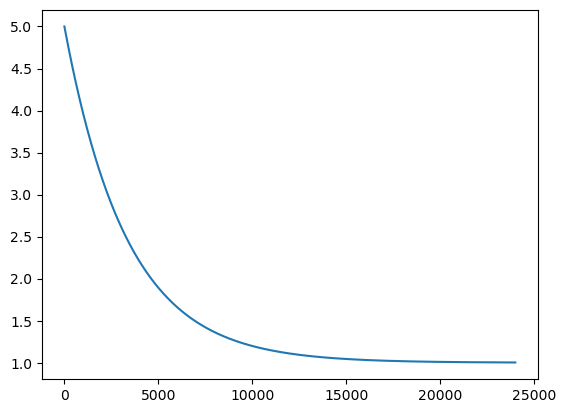

In [13]:
x = torch.arange(24000)
y = 1 + 4*0.9997**x
plt.plot(x, y)

In [2]:
task = "dominoe_sequencer"
dataset = get_dataset(task, build=True, highest_dominoe=9, hand_size=10)
batch = dataset.generate_batch(batch_size=4, return_target=True)

for k in batch.keys():
    print(k)

input
train
selection
multimode
available
hand_size
highest_dominoe
train_fraction
randomize_direction
batch_size
return_target
ignore_index
threads
value_method
value_multiplier
target
best_seq
best_dir


In [4]:
reward = dataset.reward_function(batch["target"], batch)

ib = 0
prev = batch["init"][ib]
for i, s in enumerate(batch["target"][ib]):
    if i==(batch["target"].size(1)-1):
        add_dist = batch["dists"][ib][s, batch["init"][ib]]
    else:
        add_dist = 0
    print(f"From {prev} to {s} with reward {-reward[ib][i]:.2f}, distance: {batch['dists'][ib][prev, s] + add_dist :.2f}")
    prev = s

From 7 to 6 with reward 0.15, distance: 0.15
From 6 to 9 with reward 0.32, distance: 0.32
From 9 to 0 with reward 0.34, distance: 0.34
From 0 to 5 with reward 0.57, distance: 0.57
From 5 to 8 with reward 0.29, distance: 0.29
From 8 to 3 with reward 0.28, distance: 0.28
From 3 to 2 with reward 0.56, distance: 0.56
From 2 to 4 with reward 0.48, distance: 0.48
From 4 to 1 with reward 0.40, distance: 0.40
